In [1]:
##. this makes figure 9 of the LVDB overview paper 
## the functions that compute the dynamical mass are part of the value added columns but were not at the time this figure was originally created. 

In [2]:
import corner
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

import numpy.ma as ma

In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## loads lasted versions from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
gc_ambiguous = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ambiguous.csv')
gc_mw_new = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_mw_new.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')

In [5]:
dsph_mw = table.Table.read('../data/dwarf_mw.csv')
dsph_m31 = table.Table.read('../data/dwarf_m31.csv')
dsph_lf = table.Table.read('../data/dwarf_local_field.csv')
gc_ambiguous = table.Table.read('../data/gc_ambiguous.csv')
gc_mw_new = table.Table.read('../data/gc_mw_new.csv')
gc_harris = table.Table.read('../data/gc_harris.csv')

In [6]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm Dwarf~MW}$'
label_dsph_m31 = r'${\rm Dwarf~M31}$'
label_dsph_lf = r'${\rm Dwarf~LF}$'
label_dsph_lf_distant = r'${\rm Dwarf~Distant}$'
label_gc_ufcss = r'${\rm Ambiguous/HFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Disk/Bulge/Disk}$'


In [7]:
## computes the azimuthally averaged half-light radii with errors 
## the errors are not part of the value-added columns
## this assumes Gaussian errors and averages the errors 
def compute_rhalf_error(rhalf, rhalf_em, rhalf_ep, ellipticity, ellipticity_em, ellipticity_ep, distance, distance_em, distance_ep):
    x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., 1000)
    if ma.is_masked(ellipticity_em)==False and ma.is_masked(ellipticity)==False:
        y = np.random.normal(ellipticity, (ellipticity_em+ellipticity_ep)/2., 1000)
    elif ma.is_masked(ellipticity)==False:
        y=np.empty(len(x))
        y.fill(ellipticity)
    else:
        y = np.zeros(len(x))
    if ma.is_masked(distance_em)==False and ma.is_masked(distance)==False:
        z = np.random.normal(distance, (distance_em+distance_ep)/2., 1000)
    elif ma.is_masked(distance)==False:
        z=np.empty(len(x))
        z.fill(distance)
    else:
        z = np.full(1000, distance)
    x2 = x[np.logical_and(y>=0, y<1)]
    y2 = y[np.logical_and(y>=0, y<1)]
    z2 = z[np.logical_and(y>=0, y<1)]
    comb = x2 *np.pi/180./60.*1000.*np.sqrt(1. - y2)* z2
    comb2 = comb[~np.isnan(comb)]
    if len(comb2)==0:
        return 0,0,0
    if (ma.is_masked(rhalf_em)==True or ma.is_masked(rhalf_ep)==True) and ma.is_masked(rhalf)==False:
        rh = distance*rhalf/180./60.*1000.*np.pi
        if ma.is_masked(ellipticity)==False:
            rh = rh*np.sqrt(1.-ellipticity)
            return rh, 0, 0
        else:
            return rh, 0, 0
    else:
        mean = corner.quantile(comb2, [.5, .1587, .8413, 0.0227501, 0.97725])
        return [mean[0], mean[0]-mean[1], mean[2]-mean[0]]

In [8]:
n=10000
## compuates dynamical mass and errors
## this assumes Gaussian errors and averages the errors 
def compute_mass_error(rhalf, rhalf_em, rhalf_ep, ellipticity, ellipticity_em, ellipticity_ep, distance, distance_em, distance_ep, sigma, sigma_em,sigma_ep):
    
    if ma.is_masked(rhalf_em)==False and ma.is_masked(rhalf)==False:
        x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., n)
    elif ma.is_masked(rhalf)==False:
        x=np.empty(n)
        x.fill(rhalf)
    else:
        x = np.zeros(n)
    
    if ma.is_masked(ellipticity_em)==False and ma.is_masked(ellipticity)==False:
        y = np.random.normal(ellipticity, (ellipticity_em+ellipticity_ep)/2., n)
    elif ma.is_masked(ellipticity)==False:
        y=np.empty(len(x))
        y.fill(ellipticity)
    else:
        y = np.zeros(len(x))
    
    if ma.is_masked(distance_em)==False and ma.is_masked(distance)==False:
        z = np.random.normal(distance, (distance_em+distance_ep)/2., n)
    elif ma.is_masked(distance)==False:
        z=np.empty(len(x))
        z.fill(distance)
    else:
        z = np.full(10000, distance)
    
    if ma.is_masked(sigma_em)==False and ma.is_masked(sigma_ep)==False:
        sig = np.random.normal(sigma, (sigma_em+sigma_ep)/2., n)
    elif ma.is_masked(sigma)==False:
        sig=np.empty(len(x))
        sig.fill(sigma)
    else:
        sig = np.zeros(len(x))
    
    x2 = x[np.logical_and(y>=0, y<1)]
    y2 = y[np.logical_and(y>=0, y<1)]
    z2 = z[np.logical_and(y>=0, y<1)]
    sig2 = sig[np.logical_and(y>=0, y<1)]
    
    comb_mass = 930. * x2 *np.pi/180./60.*1000.*np.sqrt(1. - y2)* z2 * sig2**2
    comb_mass2 = comb_mass[~np.isnan(comb_mass)]
    
    if (ma.is_masked(sigma_em)==True or ma.is_masked(sigma_ep)==True) and ma.is_masked(sigma)==False:
        rh = distance*rhalf/180./60.*1000.*np.pi
        comb_mass = 930. * rh * sigma**2
        
        if ma.is_masked(ellipticity)==False:
            rh = rh*np.sqrt(1.-ellipticity)
            return [comb_mass*np.sqrt(1.-ellipticity),0,0]
        else:
            return[comb_mass,0,0]
    else:
        mean_mass = corner.quantile(comb_mass2, [.5, .1587, .8413, 0.0227501, 0.97725])
        return [mean_mass[0], mean_mass[0]-mean_mass[1], mean_mass[2]-mean_mass[0]]
    

In [9]:
n=10000
## compuates average density within the half-light radius mass and errors
## this assumes Gaussian errors and averages the errors 
def compute_density_error(rhalf, rhalf_em, rhalf_ep, ellipticity, ellipticity_em, ellipticity_ep, distance, distance_em, distance_ep, sigma, sigma_em,sigma_ep):
    
    if ma.is_masked(rhalf_em)==False and ma.is_masked(rhalf)==False:
        x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., n)
    elif ma.is_masked(rhalf)==False:
        x=np.empty(n)
        x.fill(rhalf)
    else:
        x = np.zeros(n)
    
    if ma.is_masked(ellipticity_em)==False and ma.is_masked(ellipticity)==False:
        y = np.random.normal(ellipticity, (ellipticity_em+ellipticity_ep)/2., n)
    elif ma.is_masked(ellipticity)==False:
        y=np.empty(len(x))
        y.fill(ellipticity)
    else:
        y = np.zeros(len(x))
    
    if ma.is_masked(distance_em)==False and ma.is_masked(distance)==False:
        z = np.random.normal(distance, (distance_em+distance_ep)/2., n)
    elif ma.is_masked(distance)==False:
        z=np.empty(len(x))
        z.fill(distance)
    else:
        z = np.full(10000, distance)
    
    if ma.is_masked(sigma_em)==False and ma.is_masked(sigma_ep)==False:
        sig = np.random.normal(sigma, (sigma_em+sigma_ep)/2., n)
    elif ma.is_masked(sigma)==False:
        sig=np.empty(len(x))
        sig.fill(sigma)
    else:
        sig = np.zeros(len(x))
    
    x2 = x[np.logical_and(y>=0, y<1)]
    y2 = y[np.logical_and(y>=0, y<1)]
    z2 = z[np.logical_and(y>=0, y<1)]
    sig2 = sig[np.logical_and(y>=0, y<1)]
    
    rh_array = x2 *np.pi/180./60.*1000.*np.sqrt(1. - y2)* z2
    comb_mass = 930. * x2 *np.pi/180./60.*1000.*np.sqrt(1. - y2)* z2 * sig2**2
    comb_mass2 = comb_mass[~np.isnan(comb_mass)]
    rh_array2 = rh_array[~np.isnan(comb_mass)]
    comb_mass2_density = comb_mass2/(4./3.*np.pi * (4./3.*rh_array2)**3)
    if (ma.is_masked(sigma_em)==True or ma.is_masked(sigma_ep)==True) and ma.is_masked(sigma)==False:
        rh = distance*rhalf/180./60.*1000.*np.pi
        comb_mass = 930. * rh * sigma**2
        
        if ma.is_masked(ellipticity)==False:
            rh = rh*np.sqrt(1.-ellipticity)
            return [comb_mass*np.sqrt(1.-ellipticity)/(4.*np.pi/3.*(4./3.*rh)**3),0,0]
        else:
            return[comb_mass/(4.*np.pi/3.*(4./3.*rh)**3),0,0]
    else:
        mean_mass = corner.quantile(comb_mass2_density, [.5, .1587, .8413, 0.0227501, 0.97725])
        return [mean_mass[0], mean_mass[0]-mean_mass[1], mean_mass[2]-mean_mass[0]]
    

In [10]:
# dsph_mw = dsph_mw[dsph_mw['key']!='smc']
# dsph_mw = dsph_mw[dsph_mw['key']!='lmc']

In [11]:
dsph_mw['rhalf_mcmc'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['rhalf_mcmc_em'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['rhalf_mcmc_ep'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['mass_dyn_mcmc'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['mass_dyn_mcmc_em'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['mass_dyn_mcmc_ep'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['mass_dyn_mcmc_ul'] = np.zeros(len(dsph_mw), dtype=float)

dsph_mw['density_dyn_mcmc'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['density_dyn_mcmc_em'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['density_dyn_mcmc_ep'] = np.zeros(len(dsph_mw), dtype=float)
dsph_mw['density_dyn_mcmc_ul'] = np.zeros(len(dsph_mw), dtype=float)

for i in range(len(dsph_mw)):
    x= compute_rhalf_error(dsph_mw['rhalf'][i], dsph_mw['rhalf_em'][i], dsph_mw['rhalf_ep'][i], dsph_mw['ellipticity'][i], dsph_mw['ellipticity_em'], dsph_mw['ellipticity_ep'][i], dsph_mw['distance'][i], dsph_mw['distance_em'][i], dsph_mw['distance_ep'][i],)
    y= compute_mass_error(dsph_mw['rhalf'][i], dsph_mw['rhalf_em'][i], dsph_mw['rhalf_ep'][i], dsph_mw['ellipticity'][i], dsph_mw['ellipticity_em'], dsph_mw['ellipticity_ep'][i], dsph_mw['distance'][i], dsph_mw['distance_em'][i], dsph_mw['distance_ep'][i],dsph_mw['vlos_sigma'][i], dsph_mw['vlos_sigma_em'][i], dsph_mw['vlos_sigma_ep'][i])
    dsph_mw['rhalf_mcmc'][i] = x[0]
    dsph_mw['rhalf_mcmc_em'][i] = x[1]
    dsph_mw['rhalf_mcmc_ep'][i] = x[2]
#     print(dsph_mw['key'][i], dsph_mw['rhalf_mcmc'][i], dsph_mw['rhalf_sph_physical'][i])
    dsph_mw['mass_dyn_mcmc'][i] = y[0]
    dsph_mw['mass_dyn_mcmc_em'][i] = y[1]
    dsph_mw['mass_dyn_mcmc_ep'][i] = y[2]
    
    y= compute_density_error(dsph_mw['rhalf'][i], dsph_mw['rhalf_em'][i], dsph_mw['rhalf_ep'][i], dsph_mw['ellipticity'][i], dsph_mw['ellipticity_em'], dsph_mw['ellipticity_ep'][i], dsph_mw['distance'][i], dsph_mw['distance_em'][i], dsph_mw['distance_ep'][i],dsph_mw['vlos_sigma'][i], dsph_mw['vlos_sigma_em'][i], dsph_mw['vlos_sigma_ep'][i])
    
    dsph_mw['density_dyn_mcmc'][i] = y[0]
    dsph_mw['density_dyn_mcmc_em'][i] = y[1]
    dsph_mw['density_dyn_mcmc_ep'][i] = y[2]
    
    z= compute_mass_error(dsph_mw['rhalf'][i], dsph_mw['rhalf_em'][i], dsph_mw['rhalf_ep'][i], dsph_mw['ellipticity'][i], dsph_mw['ellipticity_em'], dsph_mw['ellipticity_ep'][i], dsph_mw['distance'][i], dsph_mw['distance_em'][i], dsph_mw['distance_ep'][i],dsph_mw['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_mw['mass_dyn_mcmc_ul'][i] = z[0]
    
    z= compute_density_error(dsph_mw['rhalf'][i], dsph_mw['rhalf_em'][i], dsph_mw['rhalf_ep'][i], dsph_mw['ellipticity'][i], dsph_mw['ellipticity_em'], dsph_mw['ellipticity_ep'][i], dsph_mw['distance'][i], dsph_mw['distance_em'][i], dsph_mw['distance_ep'][i],dsph_mw['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_mw['density_dyn_mcmc_ul'][i] = z[0]
#     print(dsph_mw['key'][i], dsph_mw['mass_dyn_mcmc'][i], dsph_mw['mass_dyn_mcmc_ep'][i])

In [12]:
# dsph_m31 =dsph_m31[dsph_m31['key']!='ic_0010']
# dsph_m31 =dsph_m31[dsph_m31['key']!='m_32']
# dsph_m31 =dsph_m31[dsph_m31['key']!='ngc_0147']
# dsph_m31 =dsph_m31[dsph_m31['key']!='ngc_0185']
# dsph_m31 =dsph_m31[dsph_m31['key']!='ngc_0205']

In [13]:
dsph_m31['rhalf_mcmc'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['rhalf_mcmc_em'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['rhalf_mcmc_ep'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['mass_dyn_mcmc'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['mass_dyn_mcmc_em'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['mass_dyn_mcmc_ep'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['mass_dyn_mcmc_ul'] = np.zeros(len(dsph_m31), dtype=float)

dsph_m31['density_dyn_mcmc'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['density_dyn_mcmc_em'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['density_dyn_mcmc_ep'] = np.zeros(len(dsph_m31), dtype=float)
dsph_m31['density_dyn_mcmc_ul'] = np.zeros(len(dsph_m31), dtype=float)

for i in range(len(dsph_m31)):
    x= compute_rhalf_error(dsph_m31['rhalf'][i], dsph_m31['rhalf_em'][i], dsph_m31['rhalf_ep'][i], dsph_m31['ellipticity'][i], dsph_m31['ellipticity_em'], dsph_m31['ellipticity_ep'][i], dsph_m31['distance'][i], dsph_m31['distance_em'][i], dsph_m31['distance_ep'][i],)
    y= compute_mass_error(dsph_m31['rhalf'][i], dsph_m31['rhalf_em'][i], dsph_m31['rhalf_ep'][i], dsph_m31['ellipticity'][i], dsph_m31['ellipticity_em'], dsph_m31['ellipticity_ep'][i], dsph_m31['distance'][i], dsph_m31['distance_em'][i], dsph_m31['distance_ep'][i],dsph_m31['vlos_sigma'][i], dsph_m31['vlos_sigma_em'][i], dsph_m31['vlos_sigma_ep'][i])
    dsph_m31['rhalf_mcmc'][i] = x[0]
    dsph_m31['rhalf_mcmc_em'][i] = x[1]
    dsph_m31['rhalf_mcmc_ep'][i] = x[2]
#     print(dsph_m31['key'][i], dsph_m31['rhalf_mcmc'][i], dsph_m31['rhalf_sph_physical'][i])
    dsph_m31['mass_dyn_mcmc'][i] = y[0]
    dsph_m31['mass_dyn_mcmc_em'][i] = y[1]
    dsph_m31['mass_dyn_mcmc_ep'][i] = y[2]
    
    y= compute_density_error(dsph_m31['rhalf'][i], dsph_m31['rhalf_em'][i], dsph_m31['rhalf_ep'][i], dsph_m31['ellipticity'][i], dsph_m31['ellipticity_em'], dsph_m31['ellipticity_ep'][i], dsph_m31['distance'][i], dsph_m31['distance_em'][i], dsph_m31['distance_ep'][i],dsph_m31['vlos_sigma'][i], dsph_m31['vlos_sigma_em'][i], dsph_m31['vlos_sigma_ep'][i])
    
    dsph_m31['density_dyn_mcmc'][i] = y[0]
    dsph_m31['density_dyn_mcmc_em'][i] = y[1]
    dsph_m31['density_dyn_mcmc_ep'][i] = y[2]
    
    z= compute_mass_error(dsph_m31['rhalf'][i], dsph_m31['rhalf_em'][i], dsph_m31['rhalf_ep'][i], dsph_m31['ellipticity'][i], dsph_m31['ellipticity_em'], dsph_m31['ellipticity_ep'][i], dsph_m31['distance'][i], dsph_m31['distance_em'][i], dsph_m31['distance_ep'][i],dsph_m31['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_m31['mass_dyn_mcmc_ul'][i] = z[0]
    
    z= compute_density_error(dsph_m31['rhalf'][i], dsph_m31['rhalf_em'][i], dsph_m31['rhalf_ep'][i], dsph_m31['ellipticity'][i], dsph_m31['ellipticity_em'], dsph_m31['ellipticity_ep'][i], dsph_m31['distance'][i], dsph_m31['distance_em'][i], dsph_m31['distance_ep'][i],dsph_m31['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_m31['density_dyn_mcmc_ul'][i] = z[0]
#     print(dsph_m31['key'][i], dsph_m31['rhalf_mcmc'][i], dsph_m31['rhalf_sph_physical'][i])

/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_93359/1218836126.py:5: UserWarning: Warning: converting a masked element to nan.
  x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., 1000)


In [14]:
gc_ambiguous['rhalf_mcmc'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['rhalf_mcmc_em'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['rhalf_mcmc_ep'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['mass_dyn_mcmc'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['mass_dyn_mcmc_em'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['mass_dyn_mcmc_ep'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['mass_dyn_mcmc_ul'] = np.zeros(len(gc_ambiguous), dtype=float)

gc_ambiguous['density_dyn_mcmc'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['density_dyn_mcmc_em'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['density_dyn_mcmc_ep'] = np.zeros(len(gc_ambiguous), dtype=float)
gc_ambiguous['density_dyn_mcmc_ul'] = np.zeros(len(gc_ambiguous), dtype=float)

for i in range(len(gc_ambiguous)):
    x= compute_rhalf_error(gc_ambiguous['rhalf'][i], gc_ambiguous['rhalf_em'][i], gc_ambiguous['rhalf_ep'][i], gc_ambiguous['ellipticity'][i], gc_ambiguous['ellipticity_em'], gc_ambiguous['ellipticity_ep'][i], gc_ambiguous['distance'][i], gc_ambiguous['distance_em'][i], gc_ambiguous['distance_ep'][i],)
    y= compute_mass_error(gc_ambiguous['rhalf'][i], gc_ambiguous['rhalf_em'][i], gc_ambiguous['rhalf_ep'][i], gc_ambiguous['ellipticity'][i], gc_ambiguous['ellipticity_em'], gc_ambiguous['ellipticity_ep'][i], gc_ambiguous['distance'][i], gc_ambiguous['distance_em'][i], gc_ambiguous['distance_ep'][i],gc_ambiguous['vlos_sigma'][i], gc_ambiguous['vlos_sigma_em'][i], gc_ambiguous['vlos_sigma_ep'][i])
    gc_ambiguous['rhalf_mcmc'][i] = x[0]
    gc_ambiguous['rhalf_mcmc_em'][i] = x[1]
    gc_ambiguous['rhalf_mcmc_ep'][i] = x[2]
#     print(gc_ambiguous['key'][i], gc_ambiguous['rhalf_mcmc'][i], gc_ambiguous['rhalf_sph_physical'][i])
    gc_ambiguous['mass_dyn_mcmc'][i] = y[0]
    gc_ambiguous['mass_dyn_mcmc_em'][i] = y[1]
    gc_ambiguous['mass_dyn_mcmc_ep'][i] = y[2]
    
    y= compute_density_error(gc_ambiguous['rhalf'][i], gc_ambiguous['rhalf_em'][i], gc_ambiguous['rhalf_ep'][i], gc_ambiguous['ellipticity'][i], gc_ambiguous['ellipticity_em'], gc_ambiguous['ellipticity_ep'][i], gc_ambiguous['distance'][i], gc_ambiguous['distance_em'][i], gc_ambiguous['distance_ep'][i],gc_ambiguous['vlos_sigma'][i], gc_ambiguous['vlos_sigma_em'][i], gc_ambiguous['vlos_sigma_ep'][i])
    
    gc_ambiguous['density_dyn_mcmc'][i] = y[0]
    gc_ambiguous['density_dyn_mcmc_em'][i] = y[1]
    gc_ambiguous['density_dyn_mcmc_ep'][i] = y[2]
    
    z= compute_mass_error(gc_ambiguous['rhalf'][i], gc_ambiguous['rhalf_em'][i], gc_ambiguous['rhalf_ep'][i], gc_ambiguous['ellipticity'][i], gc_ambiguous['ellipticity_em'], gc_ambiguous['ellipticity_ep'][i], gc_ambiguous['distance'][i], gc_ambiguous['distance_em'][i], gc_ambiguous['distance_ep'][i],gc_ambiguous['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    gc_ambiguous['mass_dyn_mcmc_ul'][i] = z[0]
    
    z= compute_density_error(gc_ambiguous['rhalf'][i], gc_ambiguous['rhalf_em'][i], gc_ambiguous['rhalf_ep'][i], gc_ambiguous['ellipticity'][i], gc_ambiguous['ellipticity_em'], gc_ambiguous['ellipticity_ep'][i], gc_ambiguous['distance'][i], gc_ambiguous['distance_em'][i], gc_ambiguous['distance_ep'][i],gc_ambiguous['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    gc_ambiguous['density_dyn_mcmc_ul'][i] = z[0]

/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_93359/1218836126.py:5: UserWarning: Warning: converting a masked element to nan.
  x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., 1000)


In [15]:
dsph_lf['rhalf_mcmc'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['rhalf_mcmc_em'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['rhalf_mcmc_ep'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['mass_dyn_mcmc'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['mass_dyn_mcmc_em'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['mass_dyn_mcmc_ep'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['mass_dyn_mcmc_ul'] = np.zeros(len(dsph_lf), dtype=float)

dsph_lf['density_dyn_mcmc'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['density_dyn_mcmc_em'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['density_dyn_mcmc_ep'] = np.zeros(len(dsph_lf), dtype=float)
dsph_lf['density_dyn_mcmc_ul'] = np.zeros(len(dsph_lf), dtype=float)

for i in range(len(dsph_lf)):
    x= compute_rhalf_error(dsph_lf['rhalf'][i], dsph_lf['rhalf_em'][i], dsph_lf['rhalf_ep'][i], dsph_lf['ellipticity'][i], dsph_lf['ellipticity_em'], dsph_lf['ellipticity_ep'][i], dsph_lf['distance'][i], dsph_lf['distance_em'][i], dsph_lf['distance_ep'][i],)
    y= compute_mass_error(dsph_lf['rhalf'][i], dsph_lf['rhalf_em'][i], dsph_lf['rhalf_ep'][i], dsph_lf['ellipticity'][i], dsph_lf['ellipticity_em'], dsph_lf['ellipticity_ep'][i], dsph_lf['distance'][i], dsph_lf['distance_em'][i], dsph_lf['distance_ep'][i],dsph_lf['vlos_sigma'][i], dsph_lf['vlos_sigma_em'][i], dsph_lf['vlos_sigma_ep'][i])
    dsph_lf['rhalf_mcmc'][i] = x[0]
    dsph_lf['rhalf_mcmc_em'][i] = x[1]
    dsph_lf['rhalf_mcmc_ep'][i] = x[2]
#     print(dsph_lf['key'][i], dsph_lf['rhalf_mcmc'][i], dsph_lf['rhalf_sph_physical'][i])
    dsph_lf['mass_dyn_mcmc'][i] = y[0]
    dsph_lf['mass_dyn_mcmc_em'][i] = y[1]
    dsph_lf['mass_dyn_mcmc_ep'][i] = y[2]
    
    y= compute_density_error(dsph_lf['rhalf'][i], dsph_lf['rhalf_em'][i], dsph_lf['rhalf_ep'][i], dsph_lf['ellipticity'][i], dsph_lf['ellipticity_em'], dsph_lf['ellipticity_ep'][i], dsph_lf['distance'][i], dsph_lf['distance_em'][i], dsph_lf['distance_ep'][i],dsph_lf['vlos_sigma'][i], dsph_lf['vlos_sigma_em'][i], dsph_lf['vlos_sigma_ep'][i])
    
    dsph_lf['density_dyn_mcmc'][i] = y[0]
    dsph_lf['density_dyn_mcmc_em'][i] = y[1]
    dsph_lf['density_dyn_mcmc_ep'][i] = y[2]
    
    z= compute_mass_error(dsph_lf['rhalf'][i], dsph_lf['rhalf_em'][i], dsph_lf['rhalf_ep'][i], dsph_lf['ellipticity'][i], dsph_lf['ellipticity_em'], dsph_lf['ellipticity_ep'][i], dsph_lf['distance'][i], dsph_lf['distance_em'][i], dsph_lf['distance_ep'][i],dsph_lf['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_lf['mass_dyn_mcmc_ul'][i] = z[0]
    
    z= compute_density_error(dsph_lf['rhalf'][i], dsph_lf['rhalf_em'][i], dsph_lf['rhalf_ep'][i], dsph_lf['ellipticity'][i], dsph_lf['ellipticity_em'], dsph_lf['ellipticity_ep'][i], dsph_lf['distance'][i], dsph_lf['distance_em'][i], dsph_lf['distance_ep'][i],dsph_lf['vlos_sigma_ul'][i], np.ma.masked, np.ma.masked)
    dsph_lf['density_dyn_mcmc_ul'][i] = z[0]
#     print(dsph_lf['key'][i], dsph_lf['rhalf_mcmc'][i], dsph_lf['rhalf_sph_physical'][i])

/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_93359/1218836126.py:5: UserWarning: Warning: converting a masked element to nan.
  x = np.random.normal(rhalf, (rhalf_em+rhalf_ep)/2., 1000)
/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_93359/3273795635.py:47: RuntimeWarning: invalid value encountered in divide
  comb_mass2_density = comb_mass2/(4./3.*np.pi * (4./3.*rh_array2)**3)


In [16]:
## compute luminosity from MV
def apy_lum(m_x, m_x_sun=4.83):
    return pow(10., -.4*(m_x - m_x_sun) )

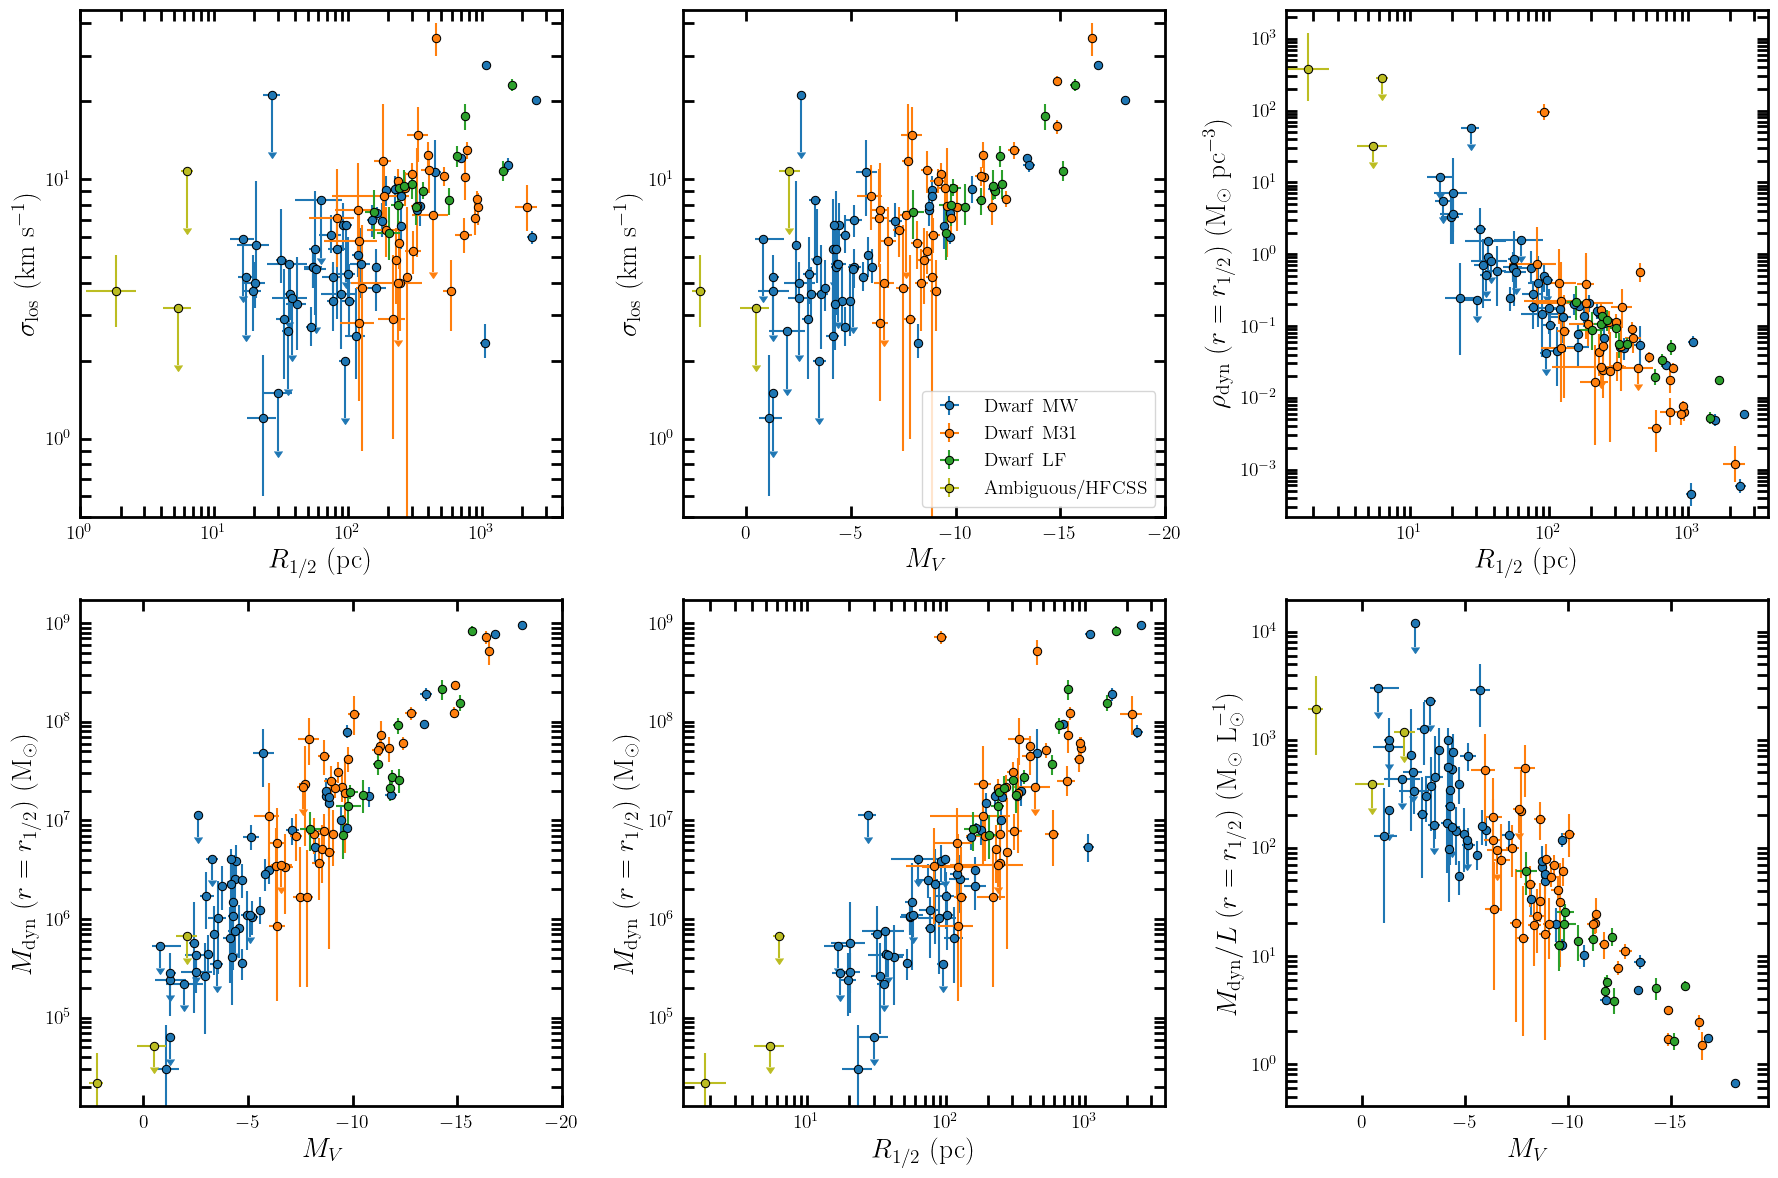

In [17]:
fig, ax = plt.subplots(2,3, figsize=(18, 12))

for obj, color, label in zip([dsph_mw, dsph_m31, dsph_lf, gc_ambiguous], [color_dsph_mw,color_dsph_m31, color_dsph_lf, color_gc_ufcss], [label_dsph_mw, label_dsph_m31, label_dsph_lf, label_gc_ufcss]):
# for obj, color, label in zip([dsph_mw, dsph_m31, dsph_lf, ], [color_dsph_mw,color_dsph_m31, color_dsph_lf, ], [label_dsph_mw, label_dsph_m31, label_dsph_lf, ]):
    ax[0][1].errorbar(obj['M_V'], obj['vlos_sigma'], fmt='o', yerr=[obj['vlos_sigma_em'], obj['vlos_sigma_ep']], xerr=[obj['M_V_em'], obj['M_V_ep']], c=color, label=label,  mec='k', mew=0.75)
    ax[0][1].errorbar(obj['M_V'], obj['vlos_sigma_ul'], fmt='o', yerr=obj['vlos_sigma_ul']*.4, uplims=True, c=color, xerr=[obj['M_V_em'], obj['M_V_ep']],  mec='k', mew=0.75)
    
    ax[0][0].errorbar(obj['rhalf_mcmc'], obj['vlos_sigma'], fmt='o', yerr=[obj['vlos_sigma_em'], obj['vlos_sigma_ep']], xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']], c=color,  mec='k', mew=0.75)
    ax[0][0].errorbar(obj['rhalf_mcmc'], obj['vlos_sigma_ul'], fmt='o', yerr=obj['vlos_sigma_ul']*.4, uplims=True, c=color, xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']],  mec='k', mew=0.75 )
    
    ax[1][0].errorbar(obj['M_V'], obj['mass_dyn_mcmc'], fmt='o', yerr=[obj['mass_dyn_mcmc_em'], obj['mass_dyn_mcmc_ep']], xerr=[obj['M_V_em'], obj['M_V_ep']], c=color,  mec='k', mew=0.75)
    ax[1][0].errorbar(obj['M_V'], obj['mass_dyn_mcmc_ul'], fmt='o', yerr=obj['mass_dyn_mcmc_ul']*.4, uplims=True, c=color, xerr=[obj['M_V_em'], obj['M_V_ep']],  mec='k', mew=0.75 )
    
    ax[1][2].errorbar(obj['M_V'], obj['mass_dyn_mcmc']/apy_lum(obj['M_V']), fmt='o', yerr=[obj['mass_dyn_mcmc_em']/apy_lum(obj['M_V']), obj['mass_dyn_mcmc_ep']/apy_lum(obj['M_V'])], xerr=[obj['M_V_em'], obj['M_V_ep']], c=color,  mec='k', mew=0.75)
    ax[1][2].errorbar(obj['M_V'], obj['mass_dyn_mcmc_ul']/apy_lum(obj['M_V']), fmt='o', yerr=obj['mass_dyn_mcmc_ul']/apy_lum(obj['M_V'])*.4, uplims=True, c=color, xerr=[obj['M_V_em'], obj['M_V_ep']],  mec='k', mew=0.75 )
    
    ax[0][2].errorbar(obj['rhalf_mcmc'], obj['density_dyn_mcmc'], fmt='o', yerr=[obj['density_dyn_mcmc_em'], obj['density_dyn_mcmc_ep']], xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']], c=color,  mec='k', mew=0.75)
    ax[0][2].errorbar(obj['rhalf_mcmc'], obj['density_dyn_mcmc_ul'], fmt='o', yerr=obj['density_dyn_mcmc_ul']*.4, uplims=True, c=color, xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']],  mec='k', mew=0.75 )
    
    ax[1][1].errorbar(obj['rhalf_mcmc'], obj['mass_dyn_mcmc'], fmt='o', yerr=[obj['mass_dyn_mcmc_em'], obj['mass_dyn_mcmc_ep']], xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']], c=color,  mec='k', mew=0.75)
    ax[1][1].errorbar(obj['rhalf_mcmc'], obj['mass_dyn_mcmc_ul'], fmt='o', yerr=obj['mass_dyn_mcmc_ul']*.4, uplims=True, c=color, xerr=[obj['rhalf_mcmc_em'], obj['rhalf_mcmc_ep']],  mec='k', mew=0.75 )
    


ax[0][0].set_xscale('log')
ax[0][0].set_ylim(0.5, 45)
ax[0][1].set_yscale('log')
ax[0][0].set_yscale('log')
ax[0][1].set_ylim(0.5, 45)
ax[0][1].set_xlim(3, -20)
ax[1][0].set_xlim(3, -20)
ax[0][0].set_xlim(1, 4e3)

ax[0][0].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[0][1].set_xlabel(r'$M_V$')
ax[0][1].set_ylabel(r'$\sigma_{\rm los}~({\rm km~s^{-1}})$')
ax[0][0].set_ylabel(r'$\sigma_{\rm los}~({\rm km~s^{-1}})$')
ax[0][1].legend(loc=4)

ax[1][0].set_yscale('log')
ax[1][0].set_xlabel(r'$M_V$')
ax[1][0].set_ylabel(r'$M_{\rm dyn}~(r=r_{1/2})~({\rm M_{\odot}})$')

ax[1][2].set_yscale('log')
ax[1][2].set_xlabel(r'$M_V$')
ax[1][2].set_ylabel(r'$M_{\rm dyn}/L~(r=r_{1/2})~({\rm M_{\odot}~L_{\odot}^{-1}})$')
ax[1][2].invert_xaxis()

ax[0][2].set_xscale('log')
ax[0][2].set_yscale('log')
ax[0][2].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[0][2].set_ylabel(r'$\rho_{\rm dyn}~(r=r_{1/2})~({\rm M_{\odot}~pc^{-3}})$')

ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[1][1].set_ylabel(r'$M_{\rm dyn}~(r=r_{1/2})~({\rm M_{\odot}})$')



plt.tight_layout()
plt.savefig('stellar_kinematics_6panal.pdf')
plt.show()